### Signal processing application in 3 mins long G critical simluated LFPs

In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import hilbert, chirp
# import tools
# sys.path.append("/mnt/c/Users/wayne/tvb/tvbtools")
sys.path.append("/mnt/w/github/tvbtools")
from tvbtools.signaltools import SignalToolkit
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# import example data
# filename = "/mnt/c/Users/wayne/tvb/gc3mins/SNC/2820A.h5"
filename = "/mnt/w/gc3mins/AD/0306A.h5"
# create an instance
subject = SignalToolkit(filename, fs=81920.)
dset = subject.hdf5_reader()
# indexing the pcg regions

spikesparas = {'prominence': 0.5, 'height': .5}
valleysparas= {'prominence': 1., 'width':3000, 'height': 0.}
spikesparas_af= {'prominence': 0.5, 'width':3000, 'height': 0.}


pcg_left = subject.signal_package(dset, 4, 'pcg_left', 2.0, 3.0, True, spikesparas, valleysparas,spikesparas_af)
pcg_right = subject.signal_package(dset, 5, 'pcg_right', 2.0, 3.0,True, spikesparas, valleysparas,spikesparas_af)

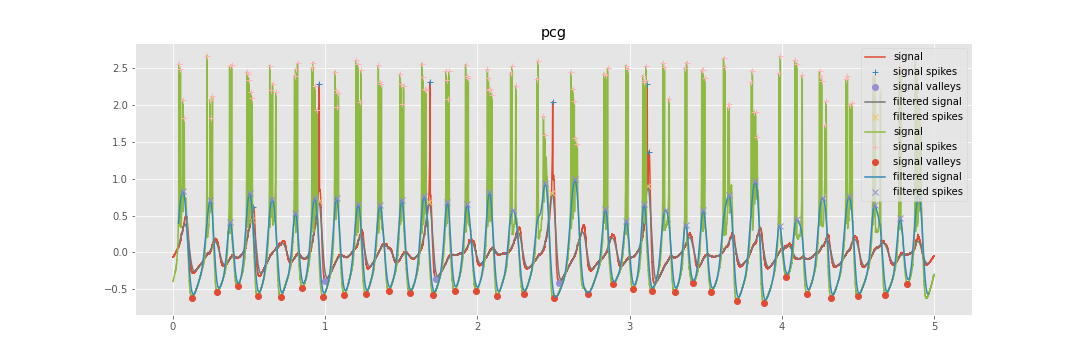

In [3]:
%matplotlib widget
fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(111)
axes = subject.signal_af(axes=axes, **pcg_left)
subject.signal_af(axes=axes, **pcg_right)
axes.set_title("pcg")
axes.legend()
plt.show()

In [4]:
subject.phase_locking(pcg_left["after_filtered"], pcg_right["after_filtered"], visual=False)

1.0952503097351531

In [5]:
amp_degree_left = subject.amp_count(data=pcg_left["data"], spikeslist=pcg_left['spikeslist'], valleyslist=pcg_left["valleyslist"], mode="p2v")
amp_degree_right = subject.amp_count(data=pcg_right["data"], spikeslist=pcg_right['spikeslist'], valleyslist=pcg_right["valleyslist"], mode="p2v")
print(amp_degree_left, amp_degree_right)


2.2683758385728563 2.8810320805438314


In [6]:
freq_num_left = subject.freq_count(data=pcg_left["data"],spikeslist=pcg_left["spikeslist"])
freq_num_right = subject.freq_count(data=pcg_right["data"],spikeslist=pcg_right["spikeslist"])
print(freq_num_left, freq_num_right)

6 119


In [7]:
delay_time = subject.phase_delay(data1=pcg_left["data"], data2=pcg_right["data"], spikeslist1=pcg_left["spikeslist"], spikeslist2=pcg_right["spikeslist"], valleyslist1=pcg_left['valleyslist'], valleyslist2=pcg_right["valleyslist"], mode = "SI")
print(delay_time)

[43283, 138339, 204360]
[3298, 18302, 30449, 39746, 52033, 65405, 74802, 87074, 98614, 110514, 122313, 133886, 146983, 157473, 169234, 181731, 195958, 214264, 232044, 243727, 252905, 263821, 275762, 284589, 296337, 311326, 326269, 334868, 347993, 362360, 376853, 390956]
-1.35877685546875
